In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Dataset: "tips"

In [3]:
# Import Example Data
DF, _dims = plst.load_dataset("tips", verbose=True)
dims = dict(
    y="tip",
    x="time",
    hue="sex",
    col="smoker",
    # row="smoker",
)
DA1 = plst.DataAnalysis(DF, dims, verbose=True)
# DA.catplot(dodge=True)

#! Imported seaborn dataset 'tips' 
	 columns:Index(['Unnamed: 0', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time',
       'size', 'size-cut'],
      dtype='object')
	 dimensions: {'y': 'tip', 'x': 'size-cut', 'hue': 'smoker', 'col': 'sex', 'row': 'time'}
#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
🫠 GROUPS UNEQUAL: Groups (8 total) have different samplesizes (n = 30.5 ±21.9).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                             |   tip |
   |:----------------------------|------:|
   | ('No', 'Male', 'Dinner')    |    77 |
   | ('Yes', 'Male', 'Dinner')   |    47 |
   | ('No', 'Female', 'Dinner')  |    29 |
   | ('No', 'Female', 'Lunch')   |    25 |
   | ('Yes', 'Female', 'Dinner') |    23 |
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
 

In [4]:
DA1.check_normality()  # False, so use non-parametric tests

W      pval  normal   n
smoker sex    time                                  
No     Female Dinner  0.968420  0.517650    True  29
              Lunch   0.859717  0.002708   False  25
       Male   Dinner  0.888382  0.000006   False  77
              Lunch   0.853800  0.006176   False  20
Yes    Female Dinner  0.952302  0.326401    True  23
              Lunch   0.840909  0.045245   False  10
       Male   Dinner  0.842716  0.000017   False  47
              Lunch   0.844004  0.023851   False  13

In [5]:
# Unpaired, Nonparametric -> Mann-Whitney U test
DA1.test_pairwise(parametric=False)

time       A      B   mean(A)    std(A)   mean(B)  \
smoker sex    Contrast                                                          
No     -      time             -  Dinner  Lunch  3.126887  1.399280  2.673778   
              sex              -  Female   Male  2.773519  1.128425  3.113402   
       NaN    time * sex  Dinner  Female   Male  3.044138  1.117885  3.158052   
              time * sex   Lunch  Female   Male  2.459600  1.078369  2.941500   
       Female sex * time     NaN  Dinner  Lunch  3.044138  1.117885  2.459600   
       Male   sex * time     NaN  Dinner  Lunch  3.158052  1.497034  2.941500   
Yes    -      time             -  Dinner  Lunch  3.066000  1.499971  2.834348   
              sex              -  Female   Male  2.931515  1.219916  3.051167   
       NaN    time * sex  Dinner  Female   Male  2.949130  1.306243  3.123191   
              time * sex   Lunch  Female   Male  2.891000  1.057286  2.790769   
       Female sex * time     NaN  Dinner  Lunch  2.949130  1.306243  2.891000   
       Male   sex * time     NaN  Dinner  Lunch  3.123191  1.596451  2.790769   

                            std(B) Paired  Parametric   U-val alternative  \
smoker sex    Contrast                                                      
No     -      time        1.282964  False       False  2961.5   two-sided   
              sex         1.489559  False       False  2347.0   two-sided   
       NaN    time * sex  1.497034  False       False  1150.0   two-sided   
              time * sex  1.485623  False       False   199.5   two-sided   
       Female sex * time  1.078369  False       False   492.5   two-sided   
       Male   sex * time  1.485623  False       False   860.5   two-sided   
Yes    -      time        1.055832  False       False   851.0   two-sided   
              sex         1.500120  False       False   993.5   two-sided   
       NaN    time * sex  1.596451  False       False   522.5   two-sided   
              time * sex  1.095738  False       False    72.0   two-sided   
       Female sex * time  1.057286  False       False   120.0   two-sided   
       Male   sex * time  1.095738  False       False   331.0   two-sided   

                             p-unc    hedges **p-unc    Sign.  \
smoker sex    Contrast                                          
No     -      time        0.018965  0.330041       *  signif.   
              sex         0.291268 -0.246473      ns    False   
       NaN    time * sex  0.814933 -0.080488      ns    False   
              time * sex  0.251853 -0.371485      ns    False   
       Female sex * time  0.024474  0.523781       *  signif.   
       Male   sex * time  0.421646  0.143727      ns    False   
Yes    -      time        0.684354  0.163454      ns    False   
              sex         0.980717 -0.084280      ns    False   
       NaN    time * sex  0.826308 -0.114096      ns    False   
              time * sex  0.683818  0.089499      ns    False   
       Female sex * time  0.859540  0.045768      ns    False   
       Male   sex * time  0.652265  0.217783      ns    False   

                                                        pairs cross  
smoker sex    Contrast                                               
No     -      time                            (Dinner, Lunch)     x  
              sex                              (Female, Male)     x  
       NaN    time * sex   ((Dinner, Male), (Dinner, Female))   hue  
              time * sex     ((Lunch, Male), (Lunch, Female))   hue  
       Female sex * time  ((Lunch, Female), (Dinner, Female))     x  
       Male   sex * time      ((Lunch, Male), (Dinner, Male))     x  
Yes    -      time                            (Dinner, Lunch)     x  
              sex                              (Female, Male)     x  
       NaN    time * sex   ((Dinner, Male), (Dinner, Female))   hue  
              time * sex     ((Lunch, Male), (Lunch, Female))   hue  
       Female sex * time  ((Lunch, Female), (Dinner, Female))  

Lunch_Female vs. Lunch_Male: Custom statistical test, P_val:2.519e-01
Dinner_Female vs. Dinner_Male: Custom statistical test, P_val:8.149e-01
Dinner_Female vs. Lunch_Female: Custom statistical test, P_val:2.447e-02
Dinner_Male vs. Lunch_Male: Custom statistical test, P_val:4.216e-01
Lunch_Male vs. Lunch_Female: Custom statistical test, P_val:6.838e-01
Dinner_Male vs. Dinner_Female: Custom statistical test, P_val:8.263e-01
Dinner_Female vs. Lunch_Female: Custom statistical test, P_val:8.595e-01
Dinner_Male vs. Lunch_Male: Custom statistical test, P_val:6.523e-01


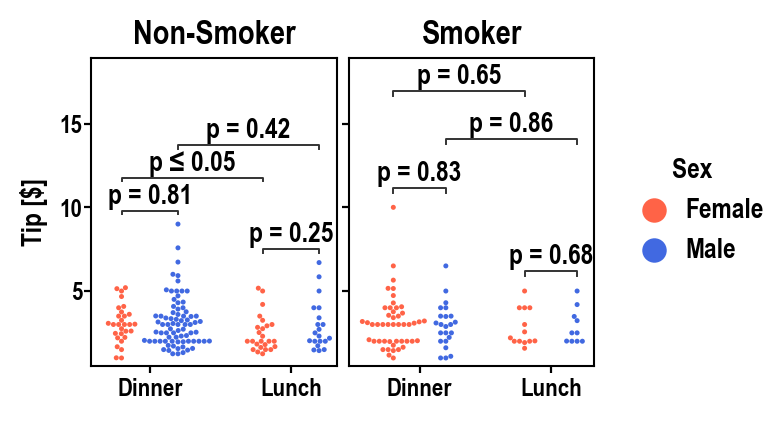

In [6]:
# Colors
plst.set_palette(["tomato", "royalblue"], verbose=False)

(
    DA1.subplots(figsize=(3, 2))
    .fillaxes(
        kind="swarm",
        dodge=True,
        size=1.8,
    )
    .annotate_pairwise(
        only_sig="all",
        text_format="simple",
        text_offset=0.5,
        verbose=True,
    )
    .edit_titles(
        axtitles=["Non-Smoker", "Smoker"],
    )
    .edit_xy_axis_labels(y="Tip [$]", x="")
    .edit_legend(capitalize_title=True)
)

plt.savefig("tips1.png", dpi=300, bbox_inches="tight")

# Dataset: "qpcr"

In [7]:
# Import Example Data
DF, _dims = plst.load_dataset("qpcr", verbose=False)
dims = dict(
    y="fc",
    x="gene",
    hue="fraction",
    # col= 'method',
    row="class",
)
DA2 = plst.DataAnalysis(DF, dims, subject="subject", verbose=False)

In [8]:
DA2.transform_y("log10", inplace=True)  # Log transform
_ = DA2.check_normality()  # -> Only few groups are not normal -> parametric

In [9]:
# Default is (paired) t-test, and since DA has subject: paired=True
_ = DA2.test_pairwise()

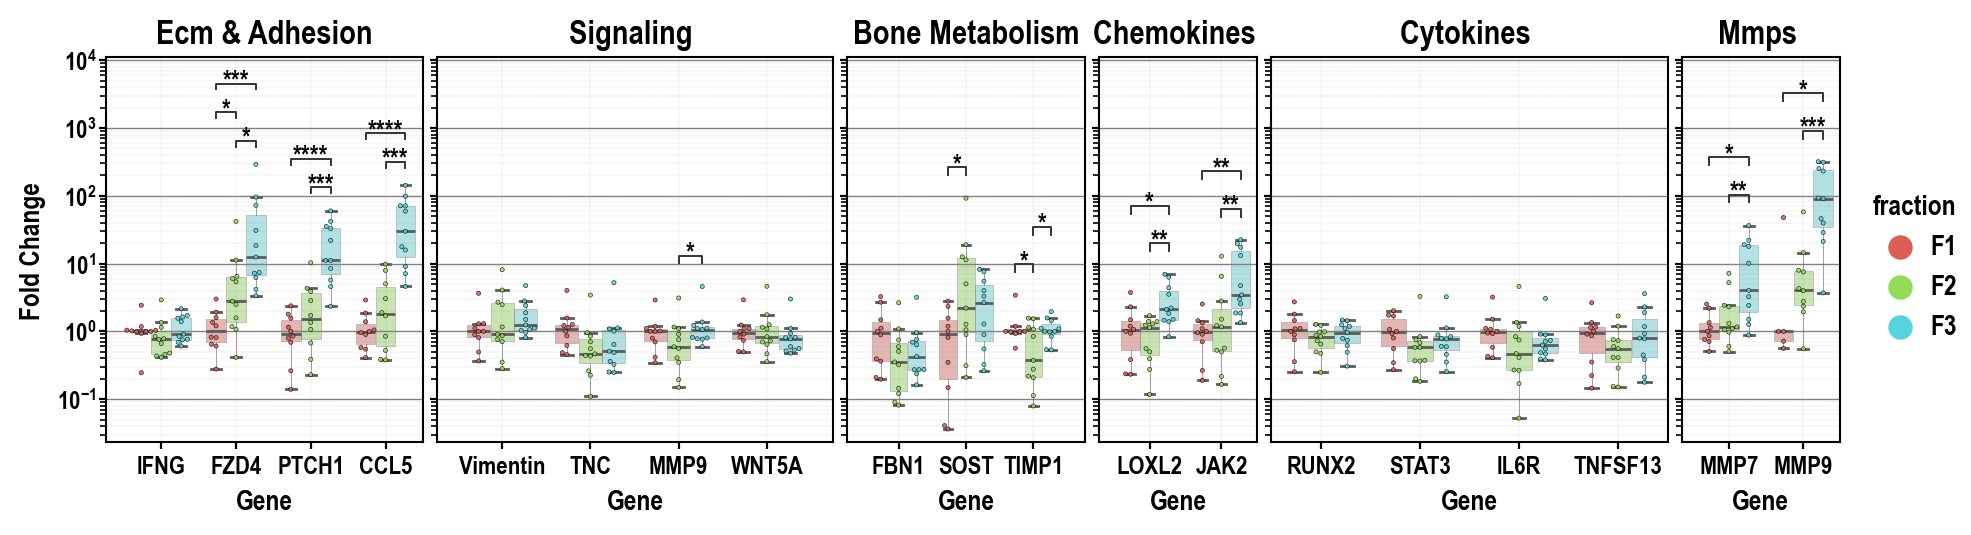

In [10]:
# Colors
plst.set_palette(["#db5f57", "#91db57", "#57d3db"], verbose=False)

# Plot
(
    DA2.switch("row", "col", verbose=False)
    .set(y="fc", inplace=False)  # set y back to to fc to display non-log values
    .plot_box_swarm(
        subplot_kws=dict(figsize=(10, 2.5), width_ratios=[4, 5, 3, 2, 5, 2]),
    )
    .edit_grid()
    .edit_y_ticklabel_percentage()
    .edit_y_scale_log(10)
    .edit_xy_axis_labels(y="Fold Change", x="Gene")
    .annotate_pairwise(include="__HUE")
)

plt.savefig("qpcr1.png", dpi=300, bbox_inches="tight")

# Dataset: "iris"

In [11]:
# Import Example Data
DF = sns.load_dataset("iris")

DF = DF.reset_index(names="subject")
DF = DF.melt(
    id_vars=["subject", "species"],
    var_name="measurement",
    value_name="length",
)
DF["leaf"] = DF["measurement"].str.split("_").str[0]
DF["orientation"] = DF["measurement"].str.split("_").str[1]
DF

,subject,species,measurement,length,leaf,orientation
0,0,setosa,sepal_length,5.1,sepal,length
1,1,setosa,sepal_length,4.9,sepal,length
2,2,setosa,sepal_length,4.7,sepal,length
3,3,setosa,sepal_length,4.6,sepal,length
4,4,setosa,sepal_length,5.0,sepal,length
...,...,...,...,...,...,...
595,145,virginica,petal_width,2.3,petal,width
596,146,virginica,petal_width,1.9,petal,width
597,147,virginica,petal_width,2.0,petal,width
598,148,virginica,petal_width,2.3,petal,width


In [12]:
dims = dict(
    y="length",
    x="species",
    hue="orientation",
    col="leaf",
)
DA3 = plst.DataAnalysis(DF, dims, subject="subject", verbose=True)
# DA.catplot(dodge=True)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (12 total) have the same samplesize n = 50.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['leaf', 'orientation'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.
✅ Subjects complete: No subjects with missing data


In [13]:
# DA3.check_normality()  # -> ratios are non normal -> non-parametric

In [14]:
### Doesn't make sense, each axes doesn't containe paired data
### -> use unpaired t-test
# DA.check_sphericity()  # eigenvalues not converging
# DA.omnibus_rm_anova()

In [15]:
# DA3.omnibus_kruskal()

In [16]:
_ = DA3.test_pairwise(paired=False, parametric=True)

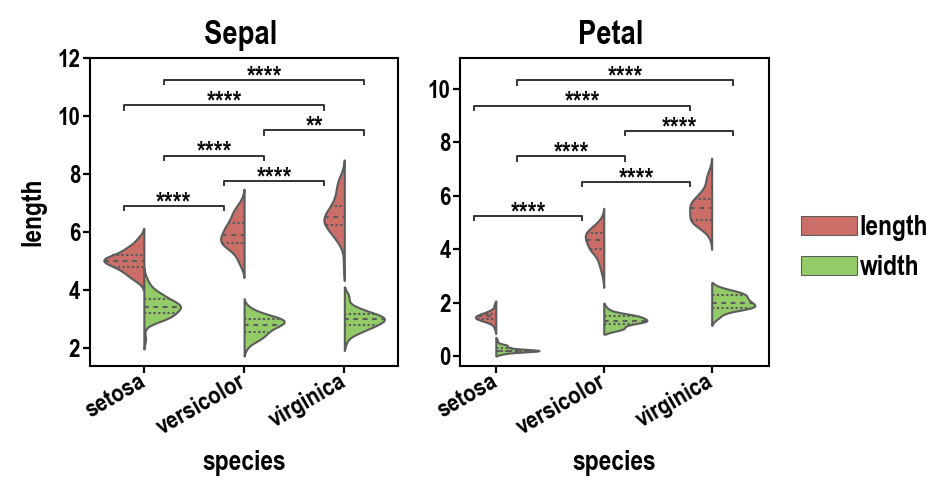

In [77]:
(
    DA3.subplots(figsize=(4, 2), sharey=False, wspace=0.2)
    .fillaxes(
        kind="violin",
        split=True,
        inner="quart",
    )
    .edit_x_ticklabels_rotate(30)
    .annotate_pairwise(
        include="__X",
    )
    .edit_legend(title="")
)
plt.savefig("iris1.png", dpi=300, bbox_inches="tight")

# Dataset: "mpg"

In [24]:
DF = sns.load_dataset("mpg")
DF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [72]:
DF = sns.load_dataset("mpg")
DF.drop("name", axis=1, inplace=True)
# DF = DF[DF["origin"] != "usa"]  # USA is not a country (says github copilot)
DF = DF.melt(
    id_vars=["model_year", "origin", "cylinders"],
    var_name="measurement",
    value_name="value",
)
DF

,model_year,origin,cylinders,measurement,value
0,70,usa,8,mpg,18.0
1,70,usa,8,mpg,15.0
2,70,usa,8,mpg,18.0
3,70,usa,8,mpg,16.0
4,70,usa,8,mpg,17.0
...,...,...,...,...,...
1985,82,usa,4,acceleration,15.6
1986,82,europe,4,acceleration,24.6
1987,82,usa,4,acceleration,11.6
1988,82,usa,4,acceleration,18.6


In [73]:
dims = dict(
    y="value",
    x="model_year",
    hue="origin",
    col="measurement",
    # row="origin",
)
DA4 = plst.DataAnalysis(DF, dims, verbose=True)
# DA4.catplot(sharey=False)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
❗️ GROUPS INCOMPLETE: Groups/facets contain single NaNs. 👉 Call
   .get_rows_with_NaN() to see them all.
   These are the first 5 rows with NaNs:
   |                              |   cylinders |   value |
   |:-----------------------------|------------:|--------:|
   | ('horsepower', 'europe', 80) |           4 |     nan |
   | ('horsepower', 'europe', 81) |           4 |     nan |
   | ('horsepower', 'usa', 71)    |           4 |     nan |
   | ('horsepower', 'usa', 74)    |           6 |     nan |
   | ('horsepower', 'usa', 80)    |           4 |     nan |
🫠 GROUPS UNEQUAL: Groups (195 total) have different samplesizes (n = 10.2
   ±7.3).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                             |   value |
   |:----------------------------|--------:|
   | ('accelera

In [74]:
DA4.test_pairwise(paired=False, parametric=False)

model_year   A   B    mean(A)  \
measurement  origin Contrast                                            
mpg          -      model_year                   -  70  71  17.689655   
                    model_year                   -  70  72  17.689655   
                    model_year                   -  70  73  17.689655   
                    model_year                   -  70  74  17.689655   
                    model_year                   -  70  75  17.689655   
...                                            ...  ..  ..        ...   
acceleration usa    origin * model_year        NaN  79  81  15.243478   
                    origin * model_year        NaN  79  82  15.243478   
                    origin * model_year        NaN  80  81  16.800000   
                    origin * model_year        NaN  80  82  16.800000   
                    origin * model_year        NaN  81  82  16.053846   

                                           std(A)    mean(B)    std(B) Paired  \
measurement  origin Contrast                                                    
mpg          -      model_year           5.339231  21.250000  6.591942  False   
                    model_year           5.339231  18.714286  5.435529  False   
                    model_year           5.339231  17.100000  4.700245  False   
                    model_year           5.339231  22.703704  6.420010  False   
                    model_year           5.339231  20.266667  4.940566  False   
...                                           ...        ...       ...    ...   
acceleration usa    origin * model_year  2.346918  16.053846  2.199475  False   
                    origin * model_year  2.346918  16.670000  2.250170  False   
                    origin * model_year  2.235322  16.053846  2.199475  False   
                    origin * model_year  2.235322  16.670000  2.250170  False   
                    origin * model_year  2.199475  16.670000  2.250170  False   

                                         Parametric  U-val alternative  \
measurement  origin Contrast                                             
mpg          -      model_year                False  283.0   two-sided   
                    model_year                False  382.5   two-sided   
                    model_year                False  631.0   two-sided   
                    model_year                False  220.0   two-sided   
                    model_year                False  313.5   two-sided   
...                                             ...    ...         ...   
acceleration usa    origin * model_year       False  115.5   two-sided   
                    origin * model_year       False  141.0   two-sided   
                    origin * model_year       False   51.5   two-sided   
                    origin * model_year       False   70.0   two-sided   
                    origin * model_year       False  104.5   two-sided   

                                            p-unc    hedges **p-unc    Sign.  \
measurement  origin Contrast                                                   
mpg          -      model_year           0.049768 -0.586529       *  signif.   
                    model_year           0.712617 -0.187609      ns    False   
                    model_year           0.537921  0.117138      ns    False   
                    model_year           0.004885 -0.840197      **  signif.   
                    model_year           0.065608 -0.494712   0.066   toler.   
...                                           ...       ...     ...      ...   
acceleration usa    origin * model_year  0.269428 -0.345110      ns    False   
                    origin * model_year  0.031055 -0.608127       *  signif.   
                    origin * model_year  0.662718  0.323143      ns    False   
                    origin * model_year  1.000000  0.056111      ns    False   
                    origin * model_year  0.356397 -0.269481      ns    False   

                                

/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


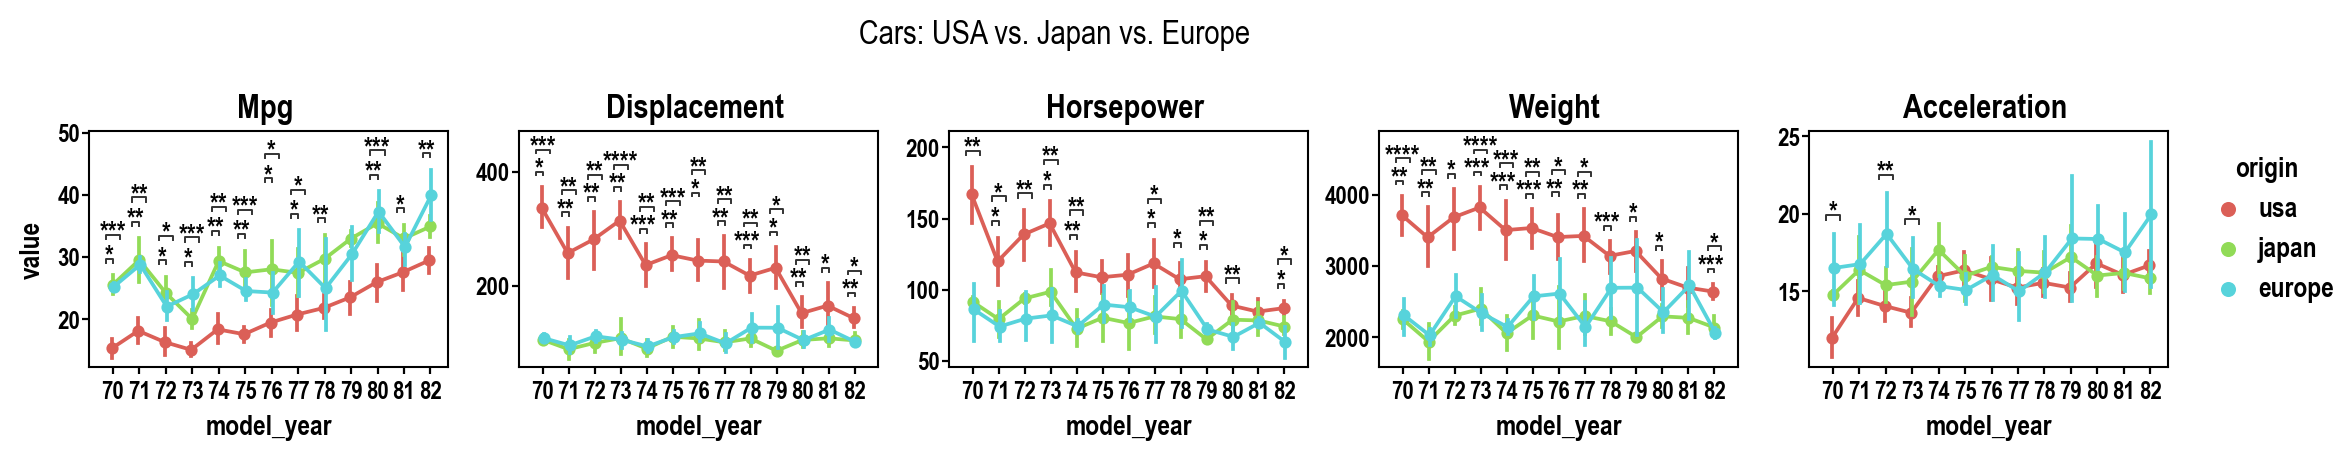

In [76]:
(
    DA4.subplots(
        figsize=(12, 2),
        sharey=False,
        wspace=0.2,
    )
    .fillaxes(
        kind="point",
        dodge=True,
    )
    .annotate_pairwise(
        include="__HUE",
    )
    .edit_legend()
)
plt.subplots_adjust(top=0.7)
plt.suptitle("Cars: USA vs. Japan vs. Europe")
plt.savefig("cars1.png", dpi=300, bbox_inches="tight")

# Dataset "titanic"

In [79]:
DF = sns.load_dataset("titanic")
DF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
